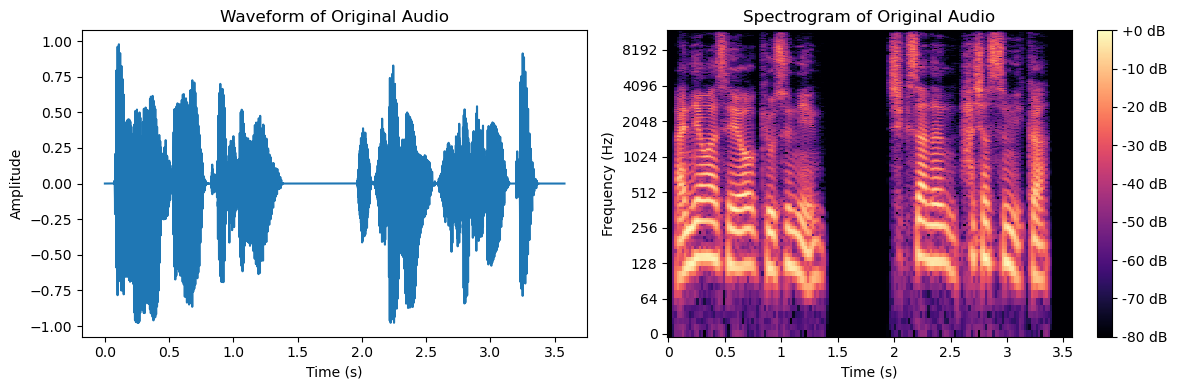

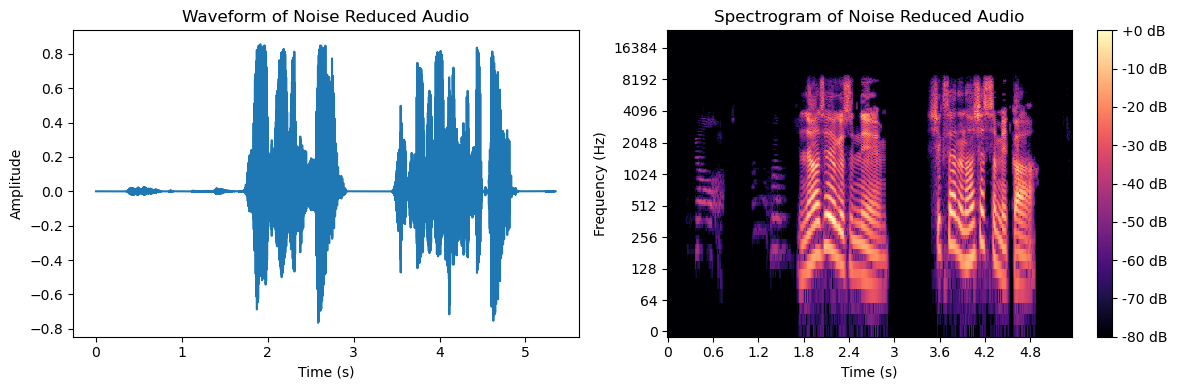

DTW 거리: 90182.60451384584
MCD: 176.48258952012034


In [132]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

# 오디오 파일 불러와서 mfcc 추출
def load_audio(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    return mfcc

# DTW를 사용하여 두 오디오 비교
def compare_audio(file_path1, file_path2):
    mfcc1 = load_audio(file_path1)
    mfcc2 = load_audio(file_path2)
    distance, path = fastdtw(mfcc1.T, mfcc2.T, dist=euclidean)
    mcd = calculate_mcd(mfcc1, mfcc2, path)
    return mfcc1, mfcc2, distance, path, mcd

# MCD 계산
def calculate_mcd(mfcc1, mfcc2, path):
    mcd_total = 0
    for (index1, index2) in path:
        mcd = np.sqrt(np.sum((mfcc1[:, index1] - mfcc2[:, index2])**2))
        mcd_total += mcd
    return mcd_total / len(path)

# 결과 시각화
def plot_dtw(mfcc1, mfcc2, path):
    plt.figure(figsize=(10, 8))
    plt.imshow(mfcc1.T, origin='lower', cmap='coolwarm', aspect='auto', interpolation='nearest')
    plt.imshow(mfcc2.T, origin='lower', cmap='coolwarm', aspect='auto', interpolation='nearest', alpha=0.5)
    for (i, j) in path:
        plt.plot([i, j], [mfcc1[0, i], mfcc2[0, j]], color='black')
    plt.title('DTW Path between Two Audio Signals')
    plt.xlabel('MFCC1')
    plt.ylabel('MFCC2')
    plt.colorbar()
    plt.show()

# 파형과 스펙트로그램 시각화 함수
def plot_waveform_and_spectrogram(file_path, title):
    y, sr = librosa.load(file_path, sr=None)
    time = np.arange(0, len(y)) / sr
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(time, y)
    plt.title(f'Waveform of {title}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.subplot(1, 2, 2)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram of {title}')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()



# 노이즈 제거 실행
original= output
file_path1 = '/home/piai/TTS_20231220-030752.wav'
file_path2 = '/home/piai/다운로드/data/사투리2.wav'

# 원본 파일 시각화
plot_waveform_and_spectrogram(original, 'Original Audio')

# 노이즈 제거 파일 시각화
plot_waveform_and_spectrogram(file_path2, 'Noise Reduced Audio')

# 비교 실행
mfcc1, mfcc2, distance, path, mcd = compare_audio(file_path1, file_path2)

# 결과 출력
print(f"DTW 거리: {distance}")
print(f"MCD: {mcd}")

# _________

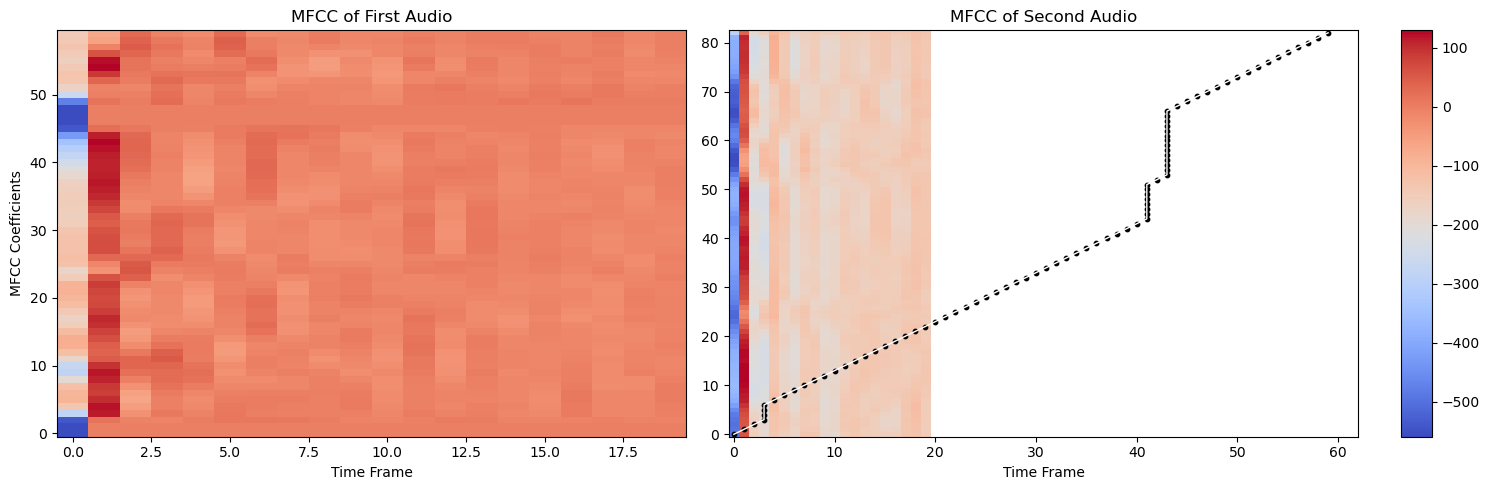

/home/piai/Clova/TTSsplit_안녕하세요_20231218-014426.wav와 /home/piai/Clova/Usersplit_안녕하세요_20231218-040117.wav 비교 결과
DTW 거리: 18510.841127436488
MCD: 223.02218361360482

--------------------------------------------------



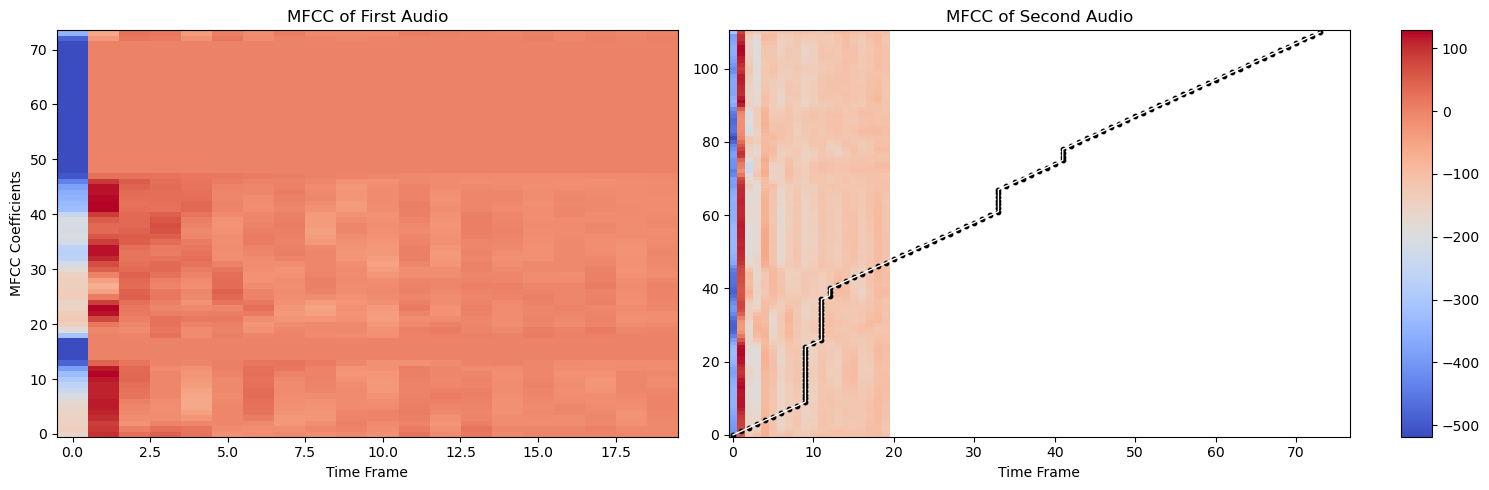

/home/piai/Clova/TTSsplit_교수님_20231218-014426.wav와 /home/piai/Clova/Usersplit_교수님_20231218-040117.wav 비교 결과
DTW 거리: 25720.545608542565
MCD: 231.7166260727891

--------------------------------------------------



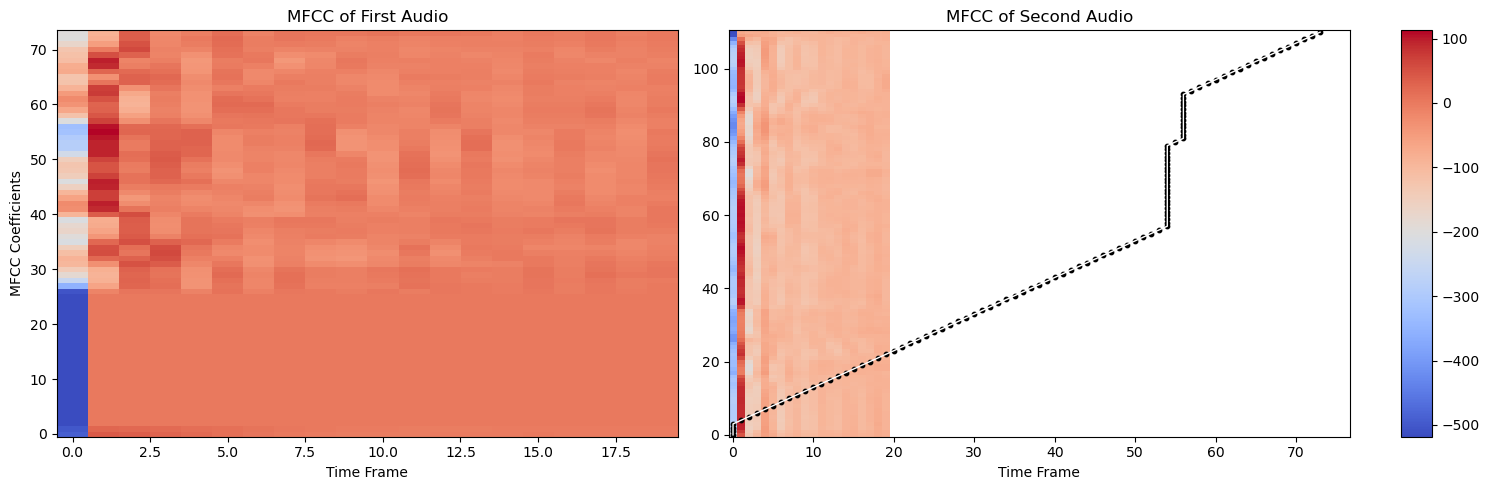

/home/piai/Clova/TTSsplit_식사는_20231218-014426.wav와 /home/piai/Clova/Usersplit_식사는_20231218-040117.wav 비교 결과
DTW 거리: 29953.59411040427
MCD: 269.85219855781077

--------------------------------------------------



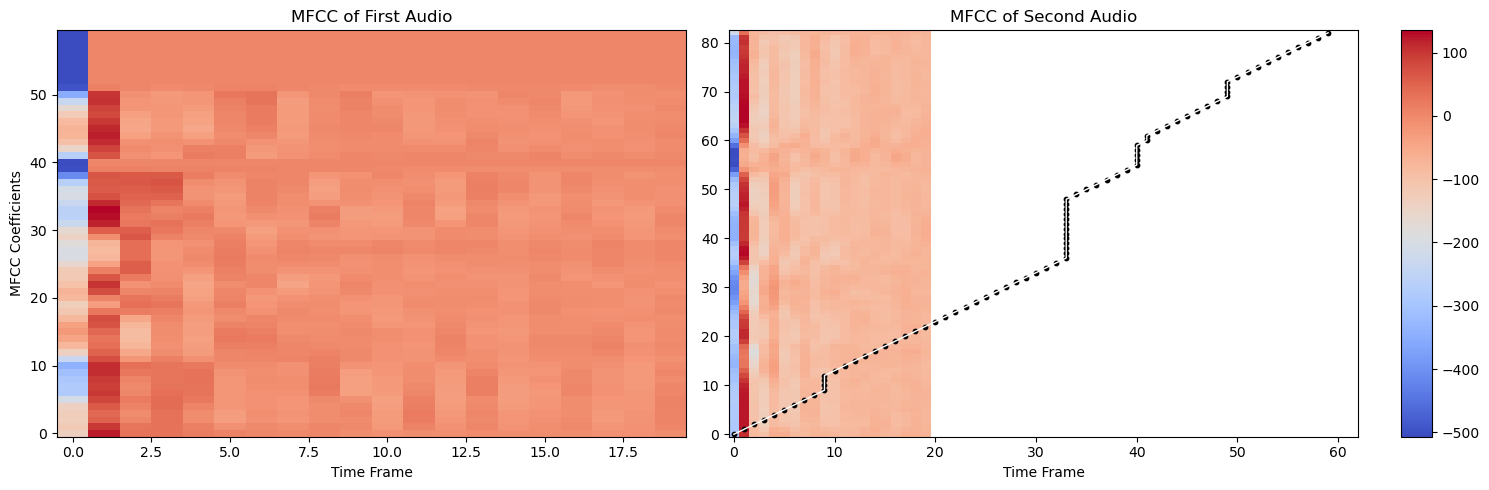

/home/piai/Clova/TTSsplit_하셨습니까_20231218-014426.wav와 /home/piai/Clova/Usersplit_하셨습니까_20231218-040117.wav 비교 결과
DTW 거리: 19663.474792870453
MCD: 236.9093343895602

--------------------------------------------------

DTW 거리의 평균값: 23462.113909813444
MCD 값의 평균값: 240.3750856584412


In [80]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

# 오디오 파일 불러와서 mfcc 추출
def load_audio(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    return mfcc

# DTW를 사용하여 두 오디오 비교
def compare_audio(file_path1, file_path2):
    mfcc1 = load_audio(file_path1)
    mfcc2 = load_audio(file_path2)
    distance, path = fastdtw(mfcc1.T, mfcc2.T, dist=euclidean)
    mcd = calculate_mcd(mfcc1, mfcc2, path)
    return mfcc1, mfcc2, distance, path, mcd

# MCD 계산
def calculate_mcd(mfcc1, mfcc2, path):
    mcd_total = 0
    for (index1, index2) in path:
        mcd = np.sqrt(np.sum((mfcc1[:, index1] - mfcc2[:, index2])**2))
        mcd_total += mcd
    return mcd_total / len(path)

# # 결과 시각화
# def plot_dtw(mfcc1, mfcc2, path):
#     plt.figure(figsize=(10, 8))
#     plt.imshow(mfcc1.T, origin='lower', cmap='coolwarm', aspect='auto', interpolation='nearest')
#     plt.imshow(mfcc2.T, origin='lower', cmap='coolwarm', aspect='auto', interpolation='nearest', alpha=0.5)
#     for (i, j) in path:
#         plt.plot([i, j], [mfcc1[0, i], mfcc2[0, j]], color='black')
#     plt.title('DTW Path between Two Audio Signals')
#     plt.xlabel('MFCC1')
#     plt.ylabel('MFCC2')
#     plt.colorbar()
#     plt.show()


def plot_dtw(mfcc1, mfcc2, path):
    # 두 MFCC 행렬의 길이
    len_mfcc1, len_mfcc2 = mfcc1.shape[1], mfcc2.shape[1]

    # 두 MFCC 행렬을 위한 좌표 그리드 생성
    x, y = np.meshgrid(np.arange(len_mfcc1), np.arange(len_mfcc2))

    # DTW 경로에서 x, y 좌표 추출
    path_x, path_y = zip(*path)

    fig, axs = plt.subplots(1, 3, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 1, 0.05]})

    # 첫 번째 MFCC 행렬 시각화
    img1 = axs[0].imshow(mfcc1.T, origin='lower', cmap='coolwarm', aspect='auto', interpolation='nearest')
    axs[0].set_title('MFCC of First Audio')
    axs[0].set_xlabel('Time Frame')
    axs[0].set_ylabel('MFCC Coefficients')

    # 두 번째 MFCC 행렬 시각화
    img2 = axs[1].imshow(mfcc2.T, origin='lower', cmap='coolwarm', aspect='auto', interpolation='nearest')
    axs[1].set_title('MFCC of Second Audio')
    axs[1].set_xlabel('Time Frame')

    # DTW 경로 시각화
    axs[1].plot(path_x, path_y, 'w-', linewidth=1)  # DTW 경로를 흰색 선으로 표시
    axs[1].scatter(path_x, path_y, s=10, c='black')  # 경로에 점 추가

    # 컬러바 추가
    fig.colorbar(img1, cax=axs[2])

    plt.tight_layout()
    plt.show()





# # 파형과 스펙트로그램 시각화 함수
# def plot_waveform_and_spectrogram(file_path, title):
#     y, sr = librosa.load(file_path, sr=None)
#     time = np.arange(0, len(y)) / sr
#     plt.figure(figsize=(12, 4))
#     plt.subplot(1, 2, 1)
#     plt.plot(time, y)
#     plt.title(f'Waveform of {title}')
#     plt.xlabel('Time (s)')
#     plt.ylabel('Amplitude')
#     plt.subplot(1, 2, 2)
#     D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
#     librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
#     plt.colorbar(format='%+2.0f dB')
#     plt.title(f'Spectrogram of {title}')
#     plt.xlabel('Time (s)')
#     plt.ylabel('Frequency (Hz)')
#     plt.tight_layout()
#     plt.show()


def plot_waveform_and_spectrogram(file_path, title):
    # 파일 로드
    y, sr = librosa.load(file_path, sr=None)
    time = np.arange(0, len(y)) / sr

    # 파형 그리기
    plt.figure(figsize=(12, 4))

    # 파형 시각화
    plt.subplot(1, 2, 1)
    plt.plot(time, y)
    plt.title(f'Waveform of {title}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    # 스펙트로그램 시각화
    plt.subplot(1, 2, 2)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear')  # y축을 선형 주파수로 변경
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram of {title}')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')

    plt.tight_layout()
    plt.show()

    
# 파일 경로 리스트
file_paths = ['/home/piai/Clova/Usersplit_안녕하세요_20231218-040117.wav', 
              '/home/piai/Clova/Usersplit_교수님_20231218-040117.wav',
              '/home/piai/Clova/Usersplit_식사는_20231218-040117.wav', 
              '/home/piai/Clova/Usersplit_하셨습니까_20231218-040117.wav']

# 새로운 비교 대상 파일 경로 리스트
output_file_paths = [
    '/home/piai/Clova/TTSsplit_안녕하세요_20231218-014426.wav',
    '/home/piai/Clova/TTSsplit_교수님_20231218-014426.wav',
    '/home/piai/Clova/TTSsplit_식사는_20231218-014426.wav',
    '/home/piai/Clova/TTSsplit_하셨습니까_20231218-014426.wav'
]



# # 비교 실행
# for i in range(len(file_paths)):
#     mfcc_output, mfcc_current, distance, path, mcd = compare_audio(output_file_paths[i], file_paths[i])

#     # 비교 시각화
#     plot_dtw(mfcc_output, mfcc_current, path)

#     # 결과 출력
#     print(f"{output_file_paths[i]}와 {file_paths[i]} 비교 결과")
#     print(f"DTW 거리: {distance}")
#     print(f"MCD: {mcd}")
#     print("\n" + "-"*50 + "\n")

# DTW 거리와 MCD 값을 저장할 리스트
dtw_distances = []
mcd_values = []

# 비교 실행
for i in range(len(file_paths)):
    mfcc_output, mfcc_current, ddistance, path, mmcd = compare_audio(output_file_paths[i], file_paths[i])

    # 비교 시각화
    plot_dtw(mfcc_output, mfcc_current, path)

    # 결과 출력 및 저장
    print(f"{output_file_paths[i]}와 {file_paths[i]} 비교 결과")
    print(f"DTW 거리: {ddistance}")
    print(f"MCD: {mmcd}")
    print("\n" + "-"*50 + "\n")

    # DTW 거리와 MCD 값 저장
    dtw_distances.append(ddistance)
    mcd_values.append(mmcd)

# 평균 DTW 거리와 MCD 값 계산
average_dtw_distance = sum(dtw_distances) / len(dtw_distances)
average_mcd = sum(mcd_values) / len(mcd_values)
print(f"DTW 거리의 평균값: {average_dtw_distance}")
print(f"MCD 값의 평균값: {average_mcd}")


In [144]:
# 기존 코드의 나머지 부분은 동일하게 유지

# 각 파일과 참조 파일 간의 차이를 계산하고 벡터화
differences = []
for i in range(len(file_paths)):
    ddistance = dtw_distances[i]
    mmcd = mcd_values[i]

    # MCD와 DTW에 가중치 적용
    weighted_difference = 0.8 * mmcd + 0.2 * ddistance
    differences.append(weighted_difference)

# 벡터화 - 유사도가 평균 이하이면 0, 그렇지 않으면 1
average_difference = np.mean(differences)
vectorized = [0 if diff <= average_difference else 1 for diff in differences]

# 결과 출력
print("Differences:", differences)
print("Vectorized:", vectorized)

# 파일 이름 또는 다른 식별자
words = ['안녕하세요', '교수님', '식사는', '하셨습니까']

# 결과에 따라 색상 적용하여 텍스트 출력
for word, val in zip(words, vectorized):
    if val == 1:
        color_code = "\033[91m"  # 빨간색
    else:
        color_code = "\033[90m"  # 검정색

    print(f"{color_code}{word}\033[0m", end=' ')


Differences: [3880.5859723781814, 5329.482422566744, 6206.600580927103, 4122.222426085739]
Vectorized: [0, 1, 1, 0]
안녕하세요 교수님 식사는 하셨습니까 

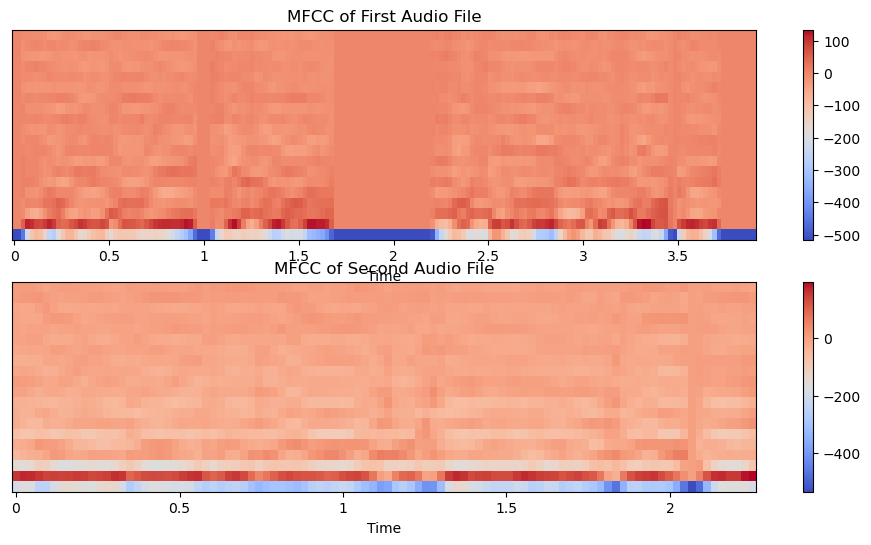

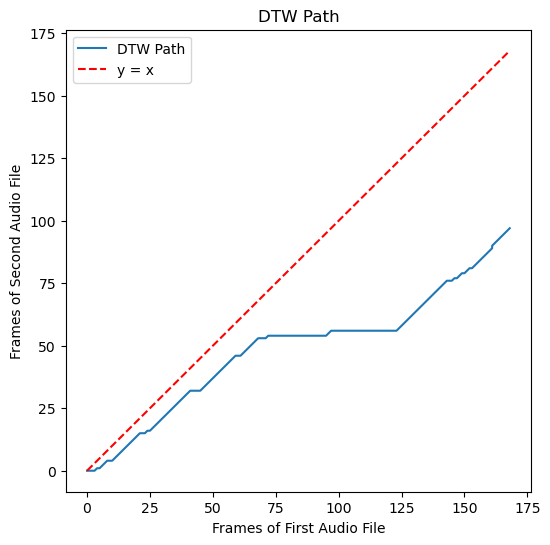

In [122]:
# 주어진 코드에 따라 MFCC 및 DTW 경로 시각화를 위한 코드를 실행하고 y=x 점선을 추가합니다.

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

# 음성 파일 로드 및 MFCC 추출 함수
def get_mfcc(file_path):
    y, sr = librosa.load(file_path)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    return mfcc, sr

# 두 음성 파일의 경로
file_path1 = '/home/piai/TTS_20231219-045429.wav'
file_path2 = '/home/piai/denoised_20231218-015344.wav'

# MFCC 추출
mfcc1, sr1 = get_mfcc(file_path1)
mfcc2, sr2 = get_mfcc(file_path2)

# DTW 경로 계산
distance, path = fastdtw(mfcc1.T, mfcc2.T, dist=euclidean)
path_x, path_y = zip(*path)

# MFCC 및 DTW 경로 시각화
plt.figure(figsize=(12, 6))

# 첫 번째 음성 파일의 MFCC
plt.subplot(2, 1, 1)
librosa.display.specshow(mfcc1, sr=sr1, x_axis='time')
plt.title('MFCC of First Audio File')
plt.colorbar()

# 두 번째 음성 파일의 MFCC
plt.subplot(2, 1, 2)
librosa.display.specshow(mfcc2, sr=sr2, x_axis='time')
plt.title('MFCC of Second Audio File')
plt.colorbar()

# DTW 경로 시각화
plt.figure(figsize=(6, 6))
plt.plot(path_x, path_y, label='DTW Path')
plt.plot([min(min(path_x), min(path_y)), max(max(path_x), max(path_y))], 
         [min(min(path_x), min(path_y)), max(max(path_x), max(path_y))], 
         'r--', label='y = x')
plt.title('DTW Path')
plt.xlabel('Frames of First Audio File')
plt.ylabel('Frames of Second Audio File')
plt.legend()
plt.show()

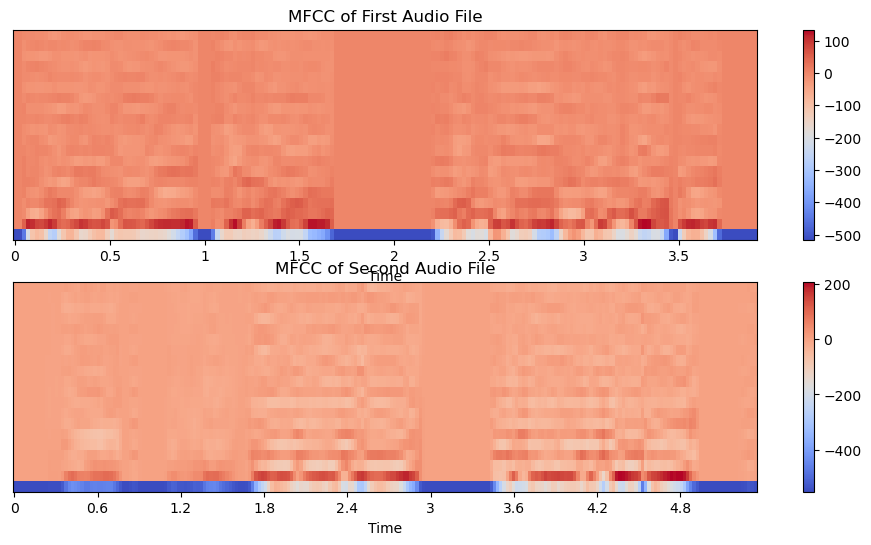

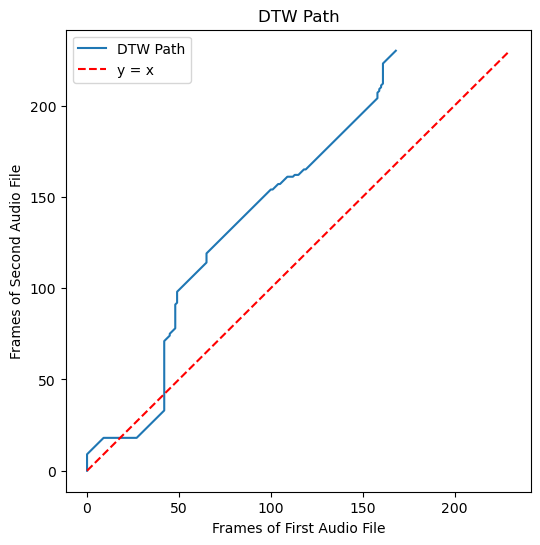

In [94]:
# 주어진 코드에 따라 MFCC 및 DTW 경로 시각화를 위한 코드를 실행하고 y=x 점선을 추가합니다.

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

# 음성 파일 로드 및 MFCC 추출 함수
def get_mfcc(file_path):
    y, sr = librosa.load(file_path)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    return mfcc, sr

# 두 음성 파일의 경로
file_path1 = '/home/piai/TTS_20231219-045429.wav'
file_path2 = '/home/piai/다운로드/data/사투리2.wav'

# MFCC 추출
mfcc1, sr1 = get_mfcc(file_path1)
mfcc2, sr2 = get_mfcc(file_path2)

# DTW 경로 계산
distance, path = fastdtw(mfcc1.T, mfcc2.T, dist=euclidean)
path_x, path_y = zip(*path)

# MFCC 및 DTW 경로 시각화
plt.figure(figsize=(12, 6))

# 첫 번째 음성 파일의 MFCC
plt.subplot(2, 1, 1)
librosa.display.specshow(mfcc1, sr=sr1, x_axis='time')
plt.title('MFCC of First Audio File')
plt.colorbar()

# 두 번째 음성 파일의 MFCC
plt.subplot(2, 1, 2)
librosa.display.specshow(mfcc2, sr=sr2, x_axis='time')
plt.title('MFCC of Second Audio File')
plt.colorbar()

# DTW 경로 시각화
plt.figure(figsize=(6, 6))
plt.plot(path_x, path_y, label='DTW Path')
plt.plot([min(min(path_x), min(path_y)), max(max(path_x), max(path_y))], 
         [min(min(path_x), min(path_y)), max(max(path_x), max(path_y))], 
         'r--', label='y = x')
plt.title('DTW Path')
plt.xlabel('Frames of First Audio File')
plt.ylabel('Frames of Second Audio File')
plt.legend()
plt.show()


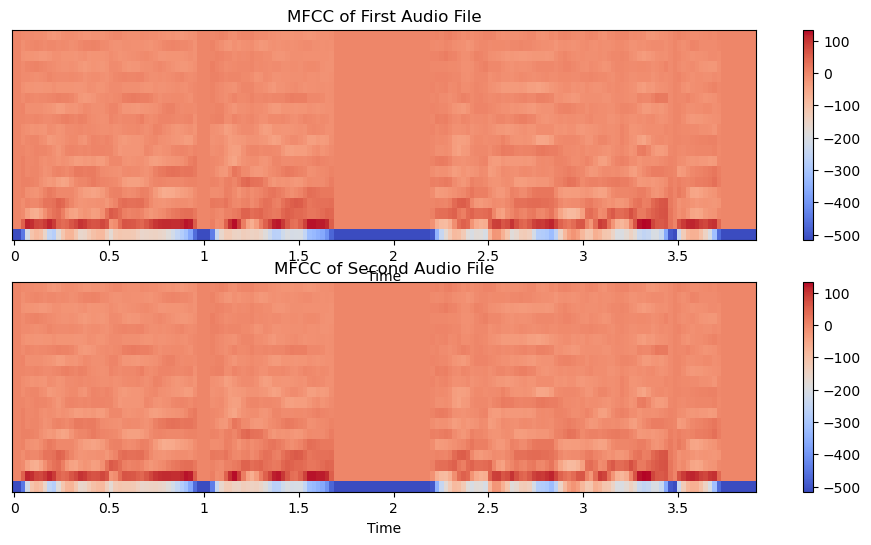

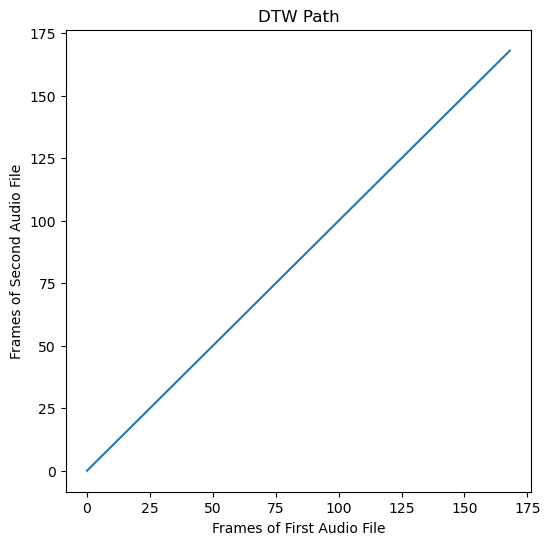

In [86]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

# 음성 파일 로드 및 MFCC 추출 함수
def get_mfcc(file_path):
    y, sr = librosa.load(file_path)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    return mfcc

# 두 음성 파일의 경로
file_path1 = '/home/piai/TTS_20231219-045429.wav'
file_path2 = '/home/piai/TTS_20231219-045429.wav'

# MFCC 추출
mfcc1 = get_mfcc(file_path1)
mfcc2 = get_mfcc(file_path2)

# DTW 경로 계산
distance, path = fastdtw(mfcc1.T, mfcc2.T, dist=euclidean)
path_x, path_y = zip(*path)

# MFCC 및 DTW 경로 시각화
plt.figure(figsize=(12, 6))

# 첫 번째 음성 파일의 MFCC
plt.subplot(2, 1, 1)
librosa.display.specshow(mfcc1, sr=sr, x_axis='time')
plt.title('MFCC of First Audio File')
plt.colorbar()

# 두 번째 음성 파일의 MFCC
plt.subplot(2, 1, 2)
librosa.display.specshow(mfcc2, sr=sr, x_axis='time')
plt.title('MFCC of Second Audio File')
plt.colorbar()

# DTW 경로 시각화
plt.figure(figsize=(6, 6))
plt.plot(path_x, path_y)
plt.title('DTW Path')
plt.xlabel('Frames of First Audio File')
plt.ylabel('Frames of Second Audio File')
plt.show()


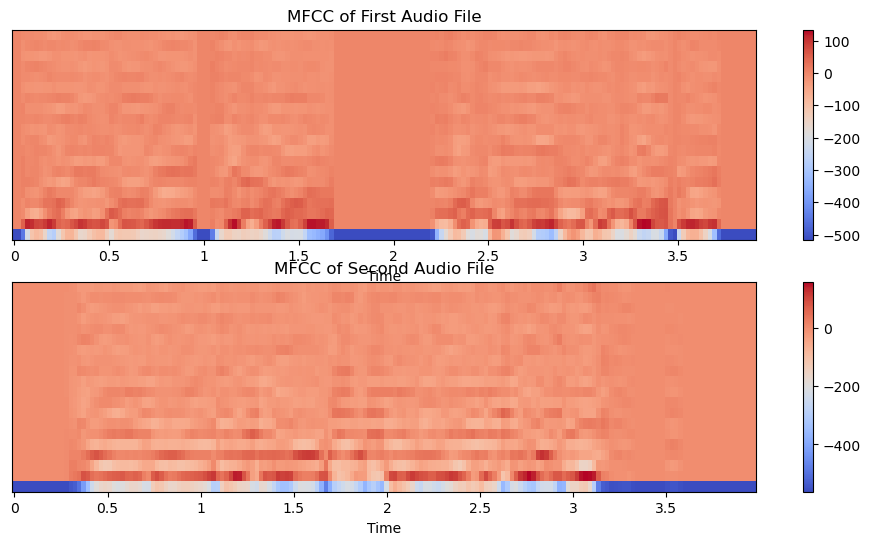

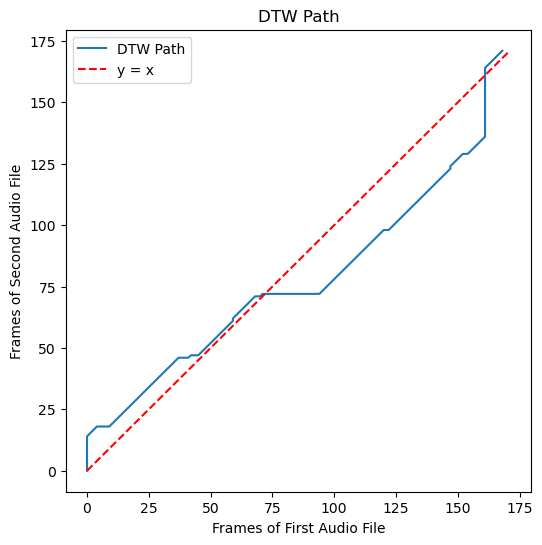

In [96]:
# 주어진 코드에 따라 MFCC 및 DTW 경로 시각화를 위한 코드를 실행하고 y=x 점선을 추가합니다.

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

# 음성 파일 로드 및 MFCC 추출 함수
def get_mfcc(file_path):
    y, sr = librosa.load(file_path)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    return mfcc, sr

# 두 음성 파일의 경로
file_path1 = '/home/piai/TTS_20231219-045429.wav'
file_path2 = '/home/piai/다운로드/data/서울말2.wav'

# MFCC 추출
mfcc1, sr1 = get_mfcc(file_path1)
mfcc2, sr2 = get_mfcc(file_path2)

# DTW 경로 계산
distance, path = fastdtw(mfcc1.T, mfcc2.T, dist=euclidean)
path_x, path_y = zip(*path)

# MFCC 및 DTW 경로 시각화
plt.figure(figsize=(12, 6))

# 첫 번째 음성 파일의 MFCC
plt.subplot(2, 1, 1)
librosa.display.specshow(mfcc1, sr=sr1, x_axis='time')
plt.title('MFCC of First Audio File')
plt.colorbar()

# 두 번째 음성 파일의 MFCC
plt.subplot(2, 1, 2)
librosa.display.specshow(mfcc2, sr=sr2, x_axis='time')
plt.title('MFCC of Second Audio File')
plt.colorbar()

# DTW 경로 시각화
plt.figure(figsize=(6, 6))
plt.plot(path_x, path_y, label='DTW Path')
plt.plot([min(min(path_x), min(path_y)), max(max(path_x), max(path_y))], 
         [min(min(path_x), min(path_y)), max(max(path_x), max(path_y))], 
         'r--', label='y = x')
plt.title('DTW Path')
plt.xlabel('Frames of First Audio File')
plt.ylabel('Frames of Second Audio File')
plt.legend()
plt.show()

36475.26028045525
[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (1, 22), (2, 23), (3, 24), (4, 25), (5, 26), (6, 27), (7, 28), (8, 29), (9, 30), (10, 31), (11, 32), (12, 33), (13, 34), (14, 35), (15, 36), (16, 37), (17, 38), (18, 39), (19, 40), (20, 41), (21, 42), (22, 42), (23, 42), (24, 42), (25, 42), (26, 42), (27, 42), (28, 42), (29, 42), (30, 42), (31, 42), (32, 42), (33, 42), (34, 42), (35, 42), (36, 42), (37, 42), (38, 42), (39, 42), (40, 42), (41, 42), (42, 42), (43, 42), (44, 42), (45, 42), (46, 42), (47, 42), (48, 42), (49, 42), (50, 42), (51, 42), (52, 42), (53, 42), (54, 42), (55, 42), (56, 42), (57, 42), (58, 42), (59, 42), (60, 42), (61, 42), (62, 42), (63, 42), (64, 42), (65, 42), (66, 42), (67, 42), (68, 42), (69, 42), (70, 42), (71, 42), (72, 42), (73, 42), (74, 42), (75, 42), (76, 42), (77, 42), (78, 42), (79, 42), (80, 42), (8

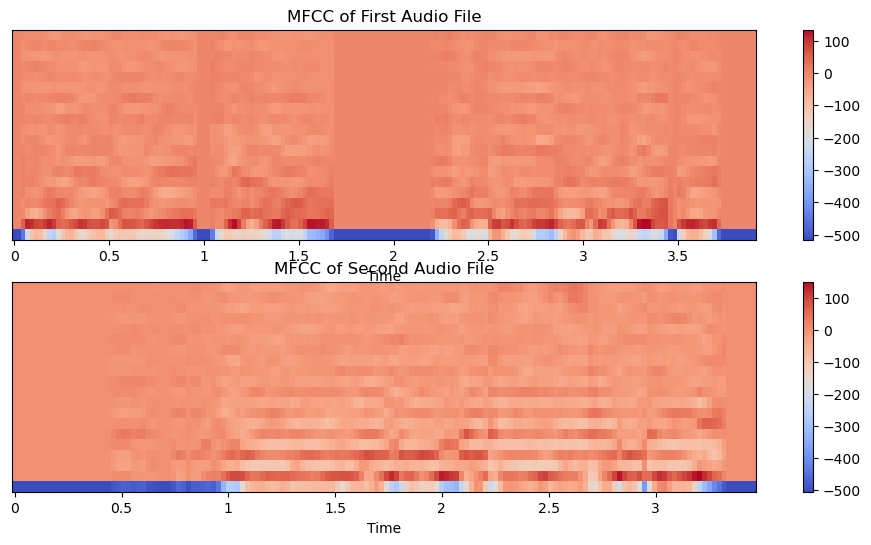

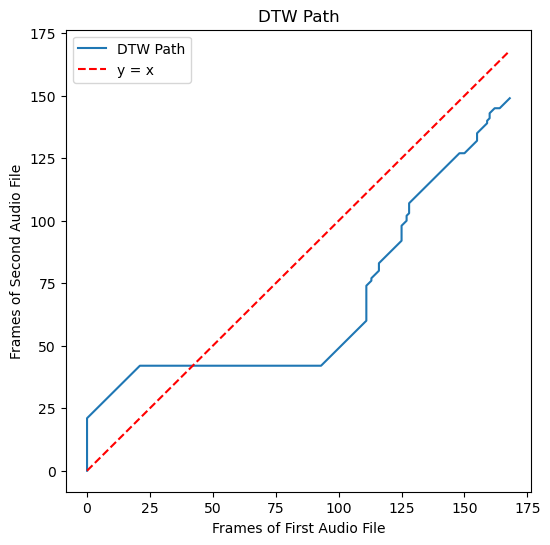

In [141]:
# 주어진 코드에 따라 MFCC 및 DTW 경로 시각화를 위한 코드를 실행하고 y=x 점선을 추가합니다.

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

# 음성 파일 로드 및 MFCC 추출 함수
def get_mfcc(file_path):
    y, sr = librosa.load(file_path)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    return mfcc, sr

# 두 음성 파일의 경로
file_path1 = '/home/piai/TTS_20231219-045429.wav'
file_path2 = '/home/piai/다운로드/data/사투리3.wav'

# MFCC 추출
mfcc1, sr1 = get_mfcc(file_path1)
mfcc2, sr2 = get_mfcc(file_path2)

# DTW 경로 계산
distance, path = fastdtw(mfcc1.T, mfcc2.T, dist=euclidean)
path_x, path_y = zip(*path)
print(distance)
print(path)
# MFCC 및 DTW 경로 시각화
plt.figure(figsize=(12, 6))

# 첫 번째 음성 파일의 MFCC
plt.subplot(2, 1, 1)
librosa.display.specshow(mfcc1, sr=sr1, x_axis='time')
plt.title('MFCC of First Audio File')
plt.colorbar()

# 두 번째 음성 파일의 MFCC
plt.subplot(2, 1, 2)
librosa.display.specshow(mfcc2, sr=sr2, x_axis='time')
plt.title('MFCC of Second Audio File')
plt.colorbar()

# DTW 경로 시각화
plt.figure(figsize=(6, 6))
plt.plot(path_x, path_y, label='DTW Path')
plt.plot([min(min(path_x), min(path_y)), max(max(path_x), max(path_y))], 
         [min(min(path_x), min(path_y)), max(max(path_x), max(path_y))], 
         'r--', label='y = x')
plt.title('DTW Path')
plt.xlabel('Frames of First Audio File')
plt.ylabel('Frames of Second Audio File')
plt.legend()
plt.show()

In [42]:
y, sr = librosa.load(file_path2, sr=None)
sr

48000

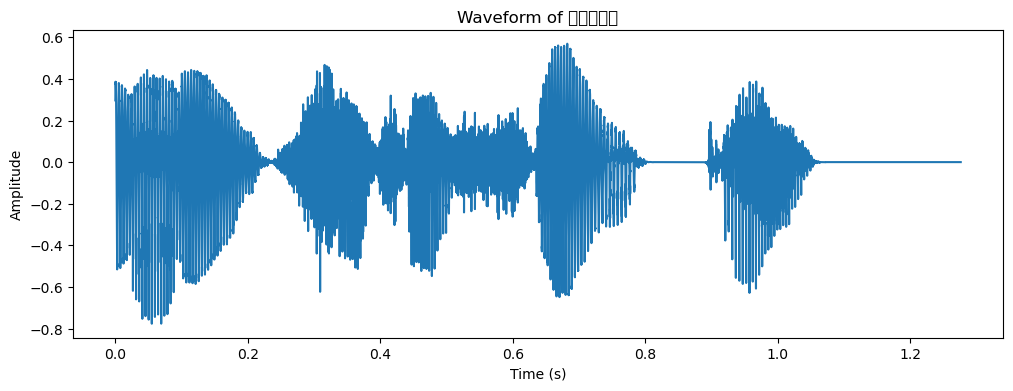

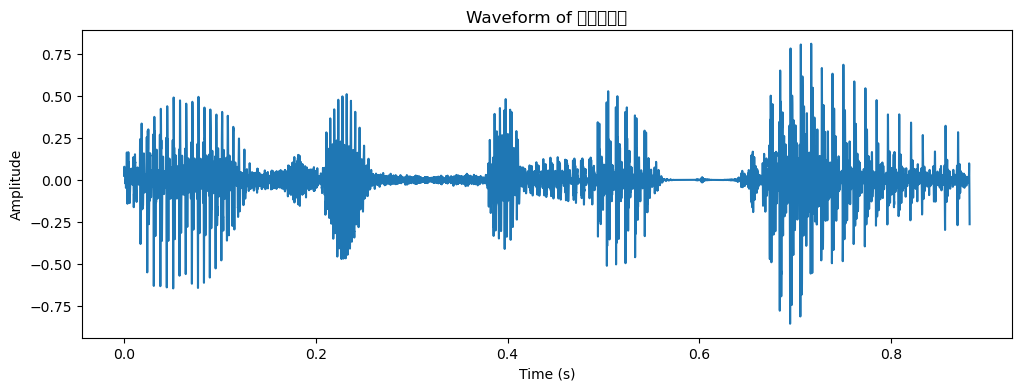

In [19]:
def plot_waveform(file_path, title):
    # 오디오 파일 로드
    y, sr = librosa.load(file_path, sr=None)
    # 시간 축 생성
    time = np.arange(0, len(y)) / sr
    # 파형 플롯
    plt.figure(figsize=(12, 4))
    plt.plot(time, y)
    plt.title(f'Waveform of {title}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

# 파일 경로
file_path = '/home/piai/Clova/TTSsplit_하셨습니까_20231218-014426.wav'
file_path2 = '/home/piai/Clova/Usersplit_하셨습니까_20231218-040117.wav'

# 파형 플롯 실행
plot_waveform(file_path, '안녕하세요')
plot_waveform(file_path2, '안녕하세요')

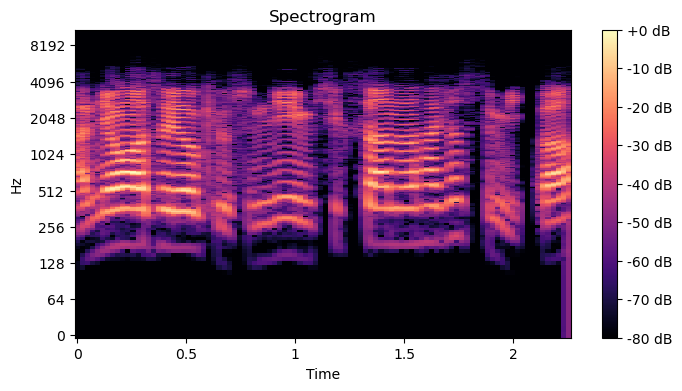

Peak: 0, Frequency: 279.93 Hz, Bandwidth: 4.53 Hz
Peak: 1, Frequency: 387.60 Hz, Bandwidth: 6.03 Hz
Peak: 2, Frequency: 538.33 Hz, Bandwidth: 2.81 Hz
Peak: 3, Frequency: 570.63 Hz, Bandwidth: 0.63 Hz
Peak: 4, Frequency: 613.70 Hz, Bandwidth: 0.27 Hz
Peak: 5, Frequency: 689.06 Hz, Bandwidth: 2.10 Hz
Peak: 6, Frequency: 742.90 Hz, Bandwidth: 3.64 Hz
Peak: 7, Frequency: 764.43 Hz, Bandwidth: 0.33 Hz
Peak: 8, Frequency: 785.96 Hz, Bandwidth: 0.55 Hz
Peak: 9, Frequency: 807.50 Hz, Bandwidth: 0.31 Hz
Peak: 10, Frequency: 850.56 Hz, Bandwidth: 0.29 Hz
Peak: 11, Frequency: 872.09 Hz, Bandwidth: 0.43 Hz
Peak: 12, Frequency: 893.63 Hz, Bandwidth: 0.36 Hz
Peak: 13, Frequency: 936.69 Hz, Bandwidth: 0.96 Hz
Peak: 14, Frequency: 979.76 Hz, Bandwidth: 2.41 Hz
Peak: 15, Frequency: 1033.59 Hz, Bandwidth: 0.37 Hz
Peak: 16, Frequency: 1055.13 Hz, Bandwidth: 1.16 Hz
Peak: 17, Frequency: 1108.96 Hz, Bandwidth: 3.42 Hz
Peak: 18, Frequency: 1173.56 Hz, Bandwidth: 1.59 Hz
Peak: 19, Frequency: 1216.63 Hz, Band

In [121]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal

audio_path = '/home/piai/denoised_20231218-015344.wav'  # 실제 오디오 파일 경로로 대체
y, sr = librosa.load(audio_path)

# 스펙트로그램 생성
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

# 스펙트로그램 시각화
plt.figure(figsize=(8, 4))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

# 특정 시간 프레임에서 스펙트럼 추출
time_frame = 50  # 50번째 프레임 선택ㅋ
spectrum = D[:, time_frame]

# 스펙트럼에서 피크 검출
peaks, _ = scipy.signal.find_peaks(spectrum)

# 피크의 대역폭 계산
results_half = scipy.signal.peak_widths(spectrum, peaks, rel_height=0.5)

# 각 피크의 주파수와 대역폭을 추출 및 출력
for i, peak in enumerate(peaks):
    freq = librosa.fft_frequencies(sr=sr)[peak]  # 피크의 주파수
    bandwidth = results_half[0][i] * (sr / len(y))  # 대역폭 계산
    print(f"Peak: {i}, Frequency: {freq:.2f} Hz, Bandwidth: {bandwidth:.2f} Hz")

In [61]:
spectrum = D[:, 50]

In [62]:
len(spectrum)

1025

In [63]:
sr

22050

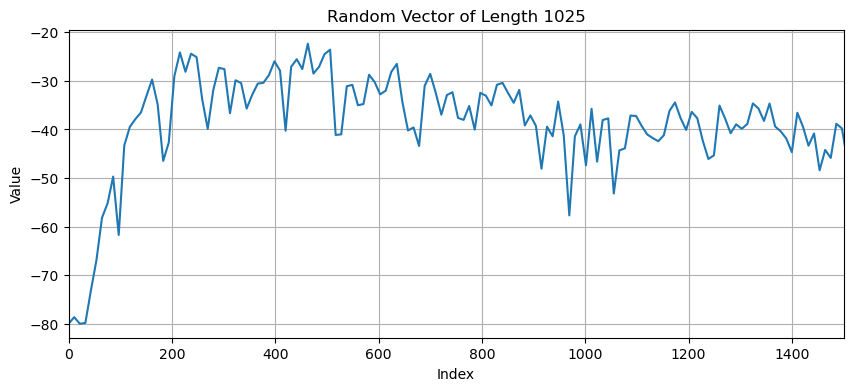

In [64]:
# x축을 0부터 22050까지 1025등분하는 벡터 생성
x_axis = np.linspace(0, 11025, 1025)

# 벡터 플롯
plt.figure(figsize=(10, 4))
plt.plot(x_axis,spectrum)
plt.xlim(0,1500)
plt.title('Random Vector of Length 1025')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid()
plt.show()
